In [22]:
# PREPROCESSING
# PREPROCESSING
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv(r"/Users/pranjali2709/Desktop/mini project/sem6/dataset.csv",index_col=0)

In [23]:
df.head(5)

,ID,AGE,PackHistory,COPDSEVERITY,MWT1,MWT2,MWT1Best,FEV1,FEV1PRED,FVC,...,SGRQ,AGEquartiles,copd,gender,smoking,Diabetes,muscular,hypertension,AtrialFib,IHD
1,58,77,60.0,SEVERE,120.0,120.0,120.0,1.21,36.0,2.40,...,69.55,4,3,1,2,1,0,0,1,0
2,57,79,50.0,MODERATE,165.0,176.0,176.0,1.09,56.0,1.64,...,44.24,4,2,0,2,1,0,0,1,1
3,62,80,11.0,MODERATE,201.0,180.0,201.0,1.52,68.0,2.30,...,44.09,4,2,0,2,1,0,0,1,0
4,145,56,60.0,VERY SEVERE,210.0,210.0,210.0,0.47,14.0,1.14,...,62.04,1,4,1,2,0,0,1,1,0
5,136,65,68.0,SEVERE,204.0,210.0,210.0,1.07,42.0,2.91,...,75.56,1,3,1,2,0,1,1,0,0


In [24]:
print(df.dtypes)

ID                int64
AGE               int64
PackHistory     float64
COPDSEVERITY     object
MWT1            float64
MWT2            float64
MWT1Best        float64
FEV1            float64
FEV1PRED        float64
FVC             float64
FVCPRED           int64
CAT               int64
HAD             float64
SGRQ            float64
AGEquartiles      int64
copd              int64
gender            int64
smoking           int64
Diabetes          int64
muscular          int64
hypertension      int64
AtrialFib         int64
IHD               int64
dtype: object


In [25]:
#printing unique values of each column
unique_values = df.apply(lambda x: x.unique())
print(unique_values)

ID              [58, 57, 62, 145, 136, 84, 93, 27, 114, 152, 1...
AGE             [77, 79, 80, 56, 65, 67, 83, 72, 75, 76, 59, 6...
PackHistory     [60.0, 50.0, 11.0, 68.0, 26.0, 90.0, 6.0, 28.0...
COPDSEVERITY                [SEVERE, MODERATE, VERY SEVERE, MILD]
MWT1            [120.0, 165.0, 201.0, 210.0, 204.0, 216.0, 214...
MWT2            [120.0, 176.0, 180.0, 210.0, 237.0, 240.0, 230...
MWT1Best        [120.0, 176.0, 201.0, 210.0, 216.0, 237.0, 240...
FEV1            [1.21, 1.09, 1.52, 0.47, 1.07, 0.69, 0.68, 2.1...
FEV1PRED        [36.0, 56.0, 68.0, 14.0, 42.0, 50.0, 35.0, 32....
FVC             [2.4, 1.64, 2.3, 1.14, 2.91, 1.99, 1.31, 2.23,...
FVCPRED         [98, 65, 86, 27, 60, 48, 77, 80, 75, 73, 45, 1...
CAT             [25, 12, 22, 28, 32, 29, 31, 23, 15, 24, 30, 2...
HAD             [8.0, 21.0, 18.0, 26.0, 30.0, 2.0, 6.0, 20.0, ...
SGRQ            [69.55, 44.24, 44.09, 62.04, 75.56, 73.82, 77....
AGEquartiles                                         [4, 1, 2, 3]
copd      

In [26]:
#level encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['COPDSEVERITY_encoded'] = label_encoder.fit_transform(df['COPDSEVERITY'])

# Step 3: Mapping for reference
severity_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Severity Mapping:", severity_mapping)

Severity Mapping: {'MILD': 0, 'MODERATE': 1, 'SEVERE': 2, 'VERY SEVERE': 3}


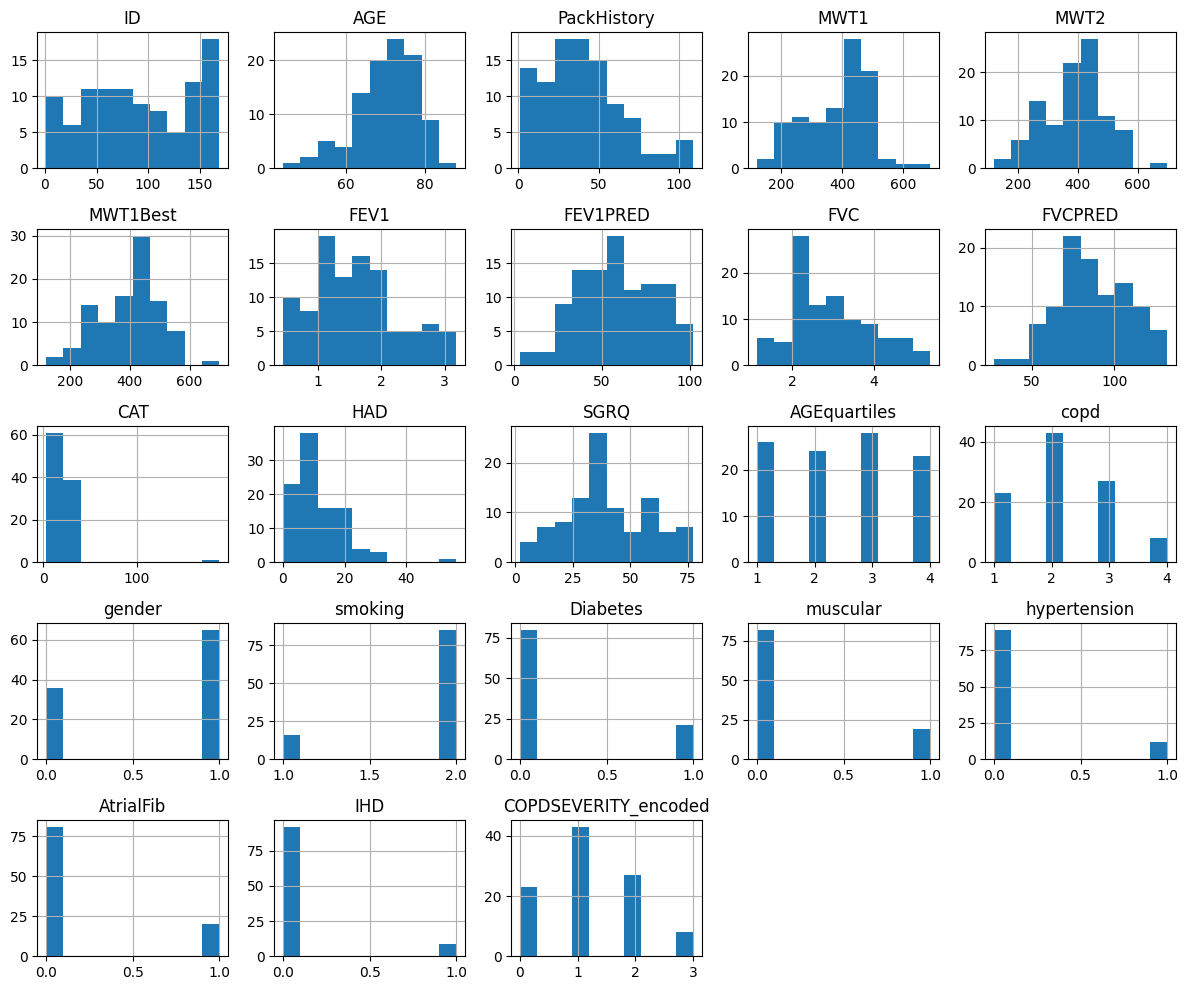

In [27]:
# Visualising histograms for numerical features to check distribution
histogram_axes = df.hist(figsize=(12, 10))  # df.hist automatically creates subplots for each numerical column

plt.tight_layout()  # Adjust layout to prevent overlapping

# Customize histogram labels
for ax in histogram_axes.flatten():  # Flatten in case of multiple subplots
    ax.set_xlabel(ax.get_xlabel(), fontsize=8)  # Reduce font size for x-axis labels
    ax.set_ylabel(ax.get_ylabel(), fontsize=8)  # Reduce font size for y-axis labels

plt.show()

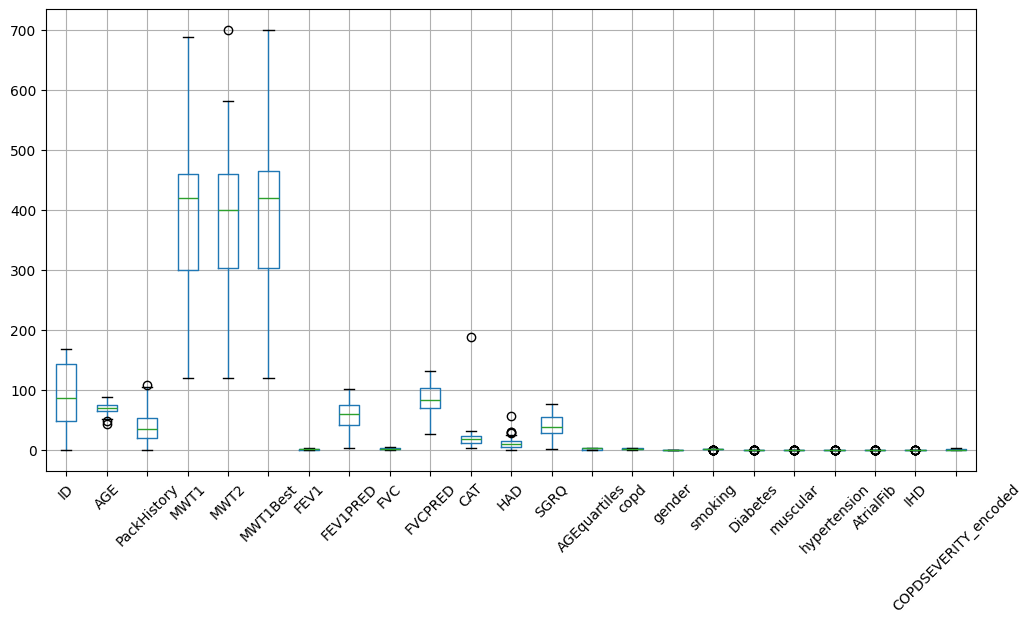

In [28]:
# Visualize box plots for numerical features to check for outliers
boxplot_fig, boxplot_axes = plt.subplots(figsize=(12, 6))
df.boxplot(ax=boxplot_axes)

# Customize box plot labels
boxplot_axes.set_xticklabels(boxplot_axes.get_xticklabels(), rotation=45)  # Rotate x-axis labels by 45 degrees

plt.show()

In [29]:
from sklearn.impute import SimpleImputer
from scipy.stats import skew

# Identify non-numeric columns
non_numeric_columns = df.select_dtypes(exclude=['number']).columns

# Drop non-numeric columns for skewness calculation
numeric_df = df.drop(columns=non_numeric_columns)

# Calculate skewness of each numerical feature
skewness = numeric_df.skew()

# Define threshold for skewness
skewness_threshold = 1

# Separate columns based on skewness
skewed_columns = skewness[abs(skewness) > skewness_threshold].index
normal_columns = skewness[abs(skewness) <= skewness_threshold].index

# Initialize SimpleImputer with median strategy for skewed columns
imputer_skewed = SimpleImputer(strategy='median')
df_skewed = pd.DataFrame(imputer_skewed.fit_transform(numeric_df[skewed_columns]), columns=skewed_columns)

# Initialize SimpleImputer with mean strategy for normal columns
imputer_normal = SimpleImputer(strategy='mean')
df_normal = pd.DataFrame(imputer_normal.fit_transform(numeric_df[normal_columns]), columns=normal_columns)

# Concatenate the imputed dataframes
df_imputed = pd.concat([df_skewed, df_normal], axis=1)

In [30]:
print("NaN values in dataset:", df_imputed.isna().sum().sum())
print("Infinity values in dataset:", np.isinf(df_imputed).sum().sum())
print("Large values in dataset:", (df_imputed > np.finfo(np.float64).max).sum().sum())

NaN values in dataset: 0
Infinity values in dataset: 0
Large values in dataset: 0


In [31]:
#removing outliers
# Calculate the IQR for each numerical feature
Q1 = df_imputed.quantile(0.25)
Q3 = df_imputed.quantile(0.75)
IQR = Q3 - Q1

# Define a multiplier to scale the IQR (you can adjust this multiplier as needed)
multiplier = 1.5

# Calculate lower and upper limits for each numerical feature
lower_limits = Q1 - (IQR * multiplier)
upper_limits = Q3 + (IQR * multiplier)

# Create a mask to identify outliers for each numerical feature
outlier_mask = ((df_imputed < lower_limits) | (df_imputed > upper_limits))

# Filter out rows containing outliers in any numerical feature
df_cleaned = df_imputed[~outlier_mask.any(axis=1)]

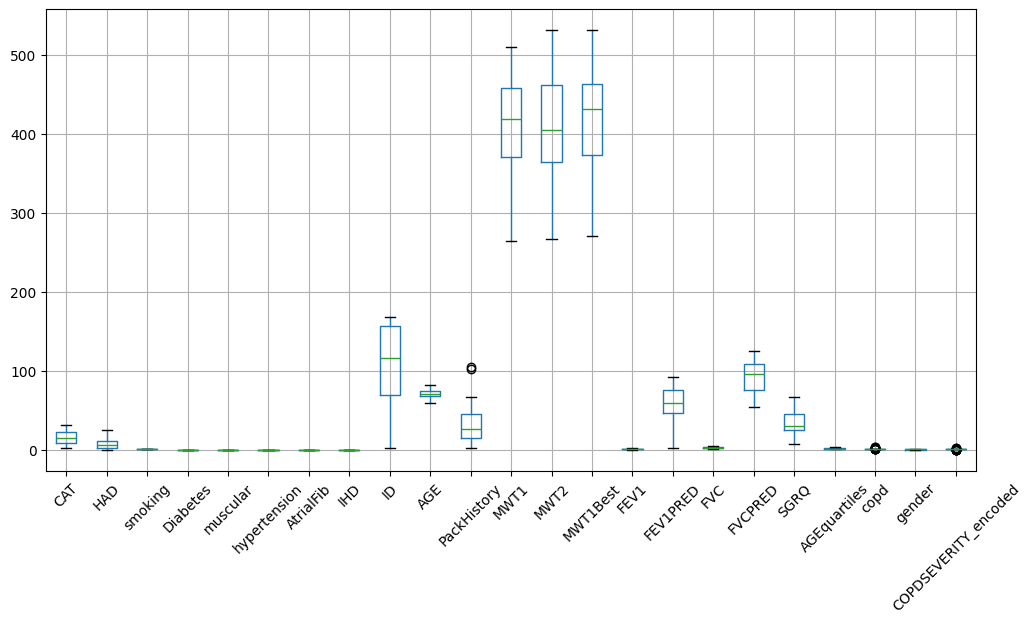

In [32]:
# Visualize box plots for numerical features to check for outliers
boxplot_fig, boxplot_axes = plt.subplots(figsize=(12, 6))
df_cleaned.boxplot(ax=boxplot_axes)

# Customize box plot labels
boxplot_axes.set_xticklabels(boxplot_axes.get_xticklabels(), rotation=45)  # Rotate x-axis labels by 45 degrees

plt.show()

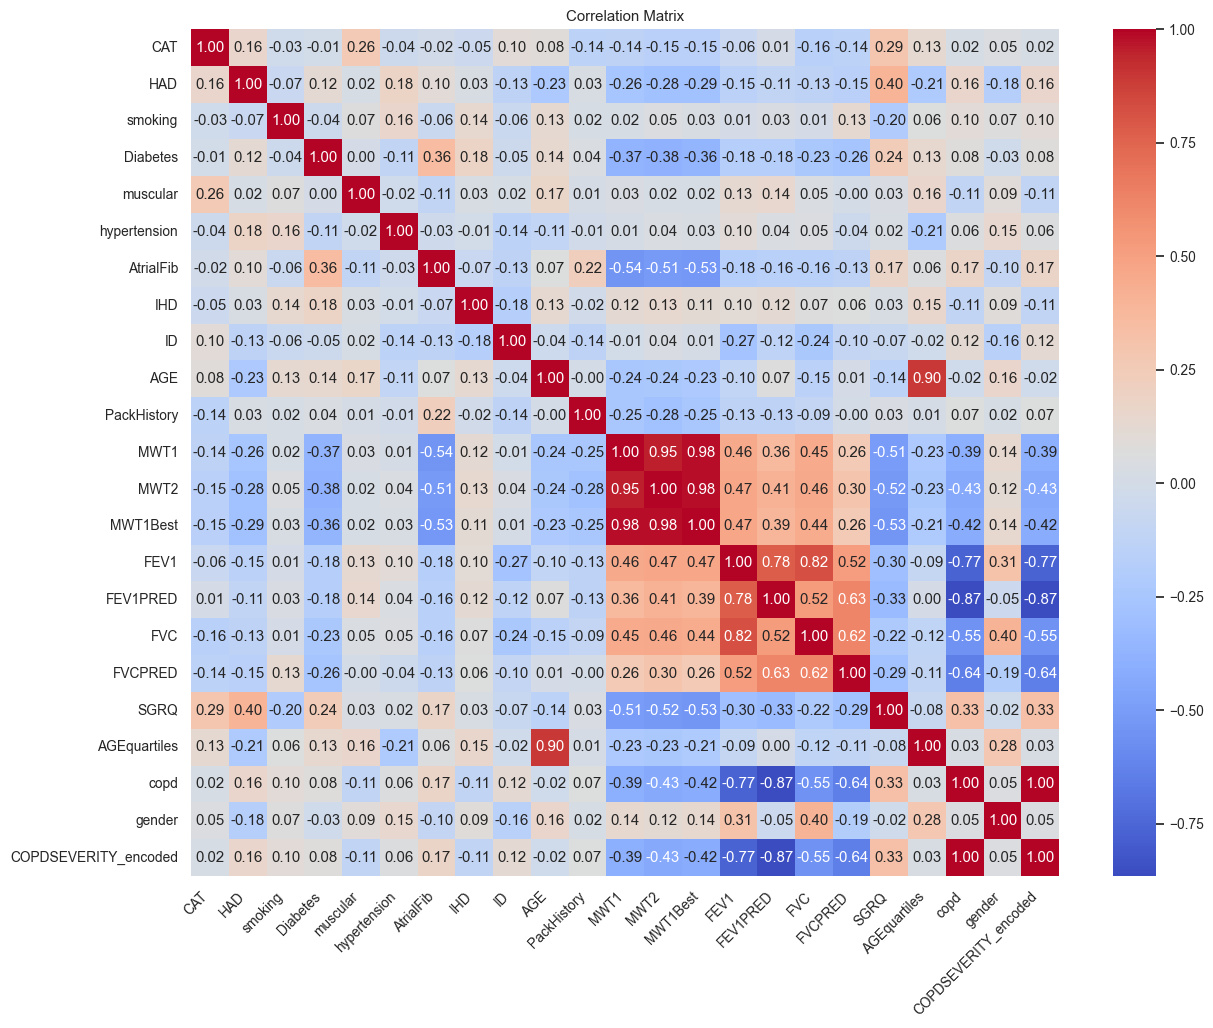

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
correlation_matrix = df_imputed.corr()

# Plot correlation matrix as a heatmap
plt.figure(figsize=(14, 11))  # Increase size of the plot
sns.set(font_scale=0.9)  # Decrease font size of annotations
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Rotate x-axis labels
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, ha='right')

# Rotate y-axis labels
heatmap.set_yticklabels(heatmap.get_yticklabels(), ha='right')

plt.title("Correlation Matrix")
plt.show()

In [34]:
# Create a correlation matrix
correlation_matrix = df_imputed.corr()

# Set a threshold for high correlation
threshold = 0.8  # You can adjust this threshold as needed

# Find columns with high correlation
high_corr_cols = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            high_corr_cols.add(colname)
            print(f"Column '{colname}' has high correlation and will be dropped.")

# Drop columns with high correlation
df_filtered = df_imputed.drop(columns=high_corr_cols)
df_filtered['copd'] = df_imputed['copd']

Column 'MWT2' has high correlation and will be dropped.
Column 'MWT1Best' has high correlation and will be dropped.
Column 'MWT1Best' has high correlation and will be dropped.
Column 'FVC' has high correlation and will be dropped.
Column 'AGEquartiles' has high correlation and will be dropped.
Column 'copd' has high correlation and will be dropped.
Column 'COPDSEVERITY_encoded' has high correlation and will be dropped.
Column 'COPDSEVERITY_encoded' has high correlation and will be dropped.


In [35]:
df_filtered

,CAT,HAD,smoking,Diabetes,muscular,hypertension,AtrialFib,IHD,ID,AGE,PackHistory,MWT1,FEV1,FEV1PRED,FVCPRED,SGRQ,gender,copd
0,25.0,8.0,2.0,1.0,0.0,0.0,1.0,0.0,58.0,77.0,60.0,120.000000,1.21,36.0,98.0,69.55,1.0,3.0
1,12.0,21.0,2.0,1.0,0.0,0.0,1.0,1.0,57.0,79.0,50.0,165.000000,1.09,56.0,65.0,44.24,0.0,2.0
2,22.0,18.0,2.0,1.0,0.0,0.0,1.0,0.0,62.0,80.0,11.0,201.000000,1.52,68.0,86.0,44.09,0.0,2.0
3,28.0,26.0,2.0,0.0,0.0,1.0,1.0,0.0,145.0,56.0,60.0,210.000000,0.47,14.0,27.0,62.04,1.0,4.0
4,32.0,18.0,2.0,0.0,1.0,1.0,0.0,0.0,136.0,65.0,68.0,204.000000,1.07,42.0,98.0,75.56,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,20.0,7.0,2.0,0.0,1.0,0.0,0.0,0.0,10.0,68.0,25.0,511.000000,2.70,98.0,108.0,35.84,1.0,1.0
97,9.0,22.0,2.0,0.0,1.0,0.0,0.0,1.0,43.0,75.0,40.0,576.000000,2.90,93.0,114.0,15.05,1.0,1.0
98,4.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,74.0,68.0,30.0,468.000000,1.65,67.0,88.0,19.70,0.0,2.0
99,10.0,10.0,2.0,0.0,0.0,0.0,0.0,0.0,108.0,54.0,30.0,688.000000,1.72,44.0,82.0,20.55,1.0,3.0


In [36]:
from sklearn.model_selection import train_test_split

In [74]:
x = df_filtered.drop(['copd'], axis=1)  # Features
y = df_filtered['copd']  # Target variable

In [77]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=47)
x_validate, x_test1, y_validate, y_test1=train_test_split(x_test,y_test,test_size=0.2,random_state=47)

In [78]:
#NAIVE BAYES
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.naive_bayes import GaussianNB

In [79]:
bayes.fit(x_train, y_train)

GaussianNB()

In [80]:
acc = (bayes.score(x_validate,y_validate))
print(acc)

0.75


In [81]:
print(bayes.score(x_test1,y_test1))

0.6


In [82]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [83]:
knn_clf = KNeighborsClassifier(n_neighbors=5)

In [84]:
knn_clf.fit(x_train, y_train)

KNeighborsClassifier()

In [85]:
y_pred = knn_clf.predict(x_test)

In [86]:
accuracy = accuracy_score(y_test, y_pred)
print("KNN Classifier Accuracy:", accuracy)

KNN Classifier Accuracy: 0.38095238095238093


In [87]:
#DECISION TREE
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [88]:
clf_entropy= DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)
clf_entropy.fit(x_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)

In [42]:
DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)

DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)

In [89]:
y_predicted = clf_entropy.predict(x_test)

In [90]:
print(accuracy_score(y_test, y_predicted))

0.9047619047619048


In [91]:
#using SVM
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Assuming 'COPD' is the target variable indicating whether a patient has COPD or not
X = df_filtered.drop(['copd'], axis=1)  # Features
y = df_filtered['copd']  # Target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47)

# Model Training
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Model Prediction
y_pred = svm_model.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8095238095238095


In [94]:
#using xgboost
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
from xgboost import XGBClassifier

X = df_filtered.drop(['copd'], axis=1)  # Features
y = df_filtered['copd']  # Target variable

# Convert y to integers
class_mapping = {cls: idx for idx, cls in enumerate(np.unique(y))}
y = y.map(class_mapping)

# Step 4: Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)

# Step 5: Constructing XGBoost model
xgb_model = XGBClassifier()

# Step 6: Hyperparameter tuning using GridSearchCV
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.05],
    'n_estimators': [100, 200, 300]
}

grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Step 7: Model Evaluation
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Best Model Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Best Model Parameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}
Accuracy: 0.8571428571428571
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.88      1.00      0.93         7
           2       0.86      0.86      0.86         7
           3       0.50      0.50      0.50         2

    accuracy                           0.86        21
   macro avg       0.81      0.79      0.79        21
weighted avg       0.86      0.86      0.86        21



In [95]:
#DBN
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [96]:
DBN_model = Sequential([
    Dense(128, activation='relu', input_shape=(x_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

/Users/pranjali2709/anaconda3/envs/lab1/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [97]:
DBN_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [98]:
DBN_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [99]:
DBN_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 214ms/step - accuracy: 0.2570 - loss: 97.2996 - val_accuracy: 0.2381 - val_loss: 38.2544
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.3406 - loss: 27.3651 - val_accuracy: 0.3333 - val_loss: -0.1455
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.4594 - loss: 4.7920 - val_accuracy: 0.3333 - val_loss: -8.7133
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - accuracy: 0.4398 - loss: -2.4402 - val_accuracy: 0.3333 - val_loss: -15.4768
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.4320 - loss: -1.5176 - val_accuracy: 0.3333 - val_loss: -21.4118
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.4867 - loss: -14.5528 - val_accuracy: 0.3333 - val_loss: -27.2994
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.4477 - loss: -13.1406 - val_accuracy: 0.3333 - val_loss: -32.4574
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.4945 - loss: -21.0855 - val_accuracy: 0.3

In [100]:
y_pred = DBN_model.predict(X_test)
y_pred = (y_pred > 0.5) 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


In [101]:
accuracy = accuracy_score(y_test, y_pred)
print("DBN Accuracy:", accuracy)

DBN Accuracy: 0.3333333333333333


In [102]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
log_reg_model = LogisticRegression()

# Train the model on the training data
log_reg_model.fit(x_train, y_train)

/Users/pranjali2709/anaconda3/envs/lab1/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [103]:
# Predictions on the testing data
y_pred = log_reg_model.predict(x_test)

# Evaluate model performance
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.42857142857142855
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.20      0.29         5
           1       0.38      0.71      0.50         7
           2       0.50      0.43      0.46         7
           3       0.00      0.00      0.00         2

    accuracy                           0.43        21
   macro avg       0.35      0.34      0.31        21
weighted avg       0.41      0.43      0.39        21



/Users/pranjali2709/anaconda3/envs/lab1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/pranjali2709/anaconda3/envs/lab1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/pranjali2709/anaconda3/envs/lab1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m

In [104]:
#RANDOM FOREST
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [105]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42) 

In [106]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [107]:
y_pred = rf_clf.predict(X_test)

In [108]:
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Classifier Accuracy:", accuracy)

Random Forest Classifier Accuracy: 0.9047619047619048


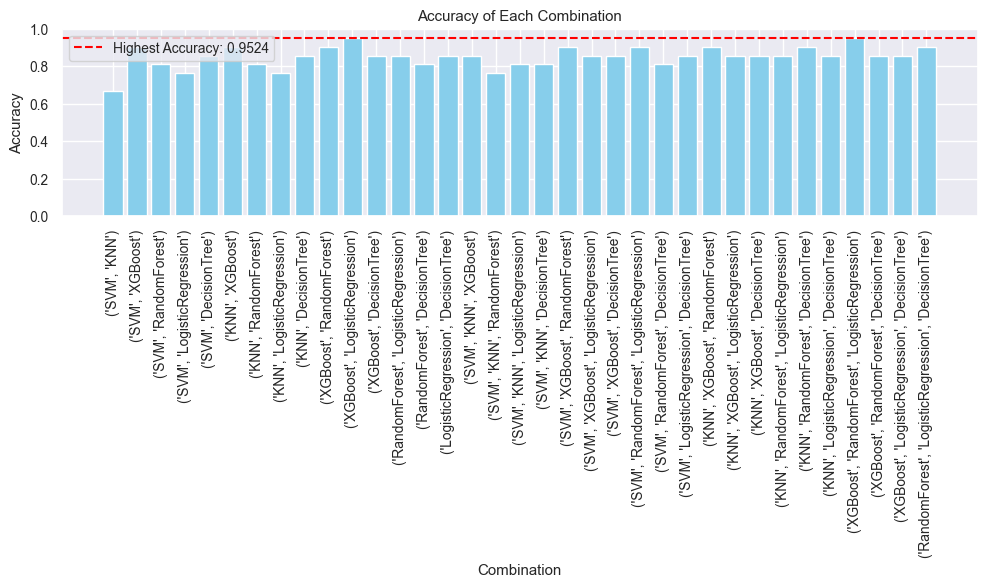


Best Combination: ('XGBoost', 'LogisticRegression') Accuracy: 0.9523809523809523


In [115]:
from sklearn.ensemble import VotingClassifier
import matplotlib.pyplot as plt
import numpy as np
from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler  # For scaling the data

# Assuming X (features) and y (target) are already defined
# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)

# Step 2: Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Define the models
models = {
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(),
    'RandomForest': RandomForestClassifier(),
    'LogisticRegression': LogisticRegression(max_iter=500),  # Increased max_iter to ensure convergence
    'DecisionTree': DecisionTreeClassifier()
}

# Step 4: Generate all possible combinations of 2-3 models
combos = []
combo_accuracies = []  # List to store accuracies for each combination
for r in range(2, 4):  # 2-3 models
    combos.extend(combinations(models.keys(), r))

best_accuracy = 0
best_combo = None

# Step 5: Loop through each combination of models
for combo in combos:
    # Initialize the ensemble models list
    ensemble_models = []
    for model_name in combo:
        # Add the model to the ensemble models list
        ensemble_models.append((model_name, models[model_name]))

    # Create a voting classifier with the current combination of models
    voting_clf = VotingClassifier(estimators=ensemble_models, voting='soft')

    # Train the ensemble model
    voting_clf.fit(X_train_scaled, y_train)

    # Predictions from the ensemble model
    y_pred = voting_clf.predict(X_test_scaled)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    combo_accuracies.append(accuracy)

    # Update the best accuracy and best combination if the current accuracy is higher
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_combo = combo

# Step 6: Plotting the accuracies
plt.figure(figsize=(10, 6))
plt.bar(np.arange(len(combos)), combo_accuracies, color='skyblue')
plt.xlabel('Combination')
plt.ylabel('Accuracy')
plt.title('Accuracy of Each Combination')
plt.xticks(np.arange(len(combos)), [str(combo) for combo in combos], rotation=90)
plt.axhline(y=best_accuracy, color='red', linestyle='--', label=f'Highest Accuracy: {best_accuracy:.4f}')
plt.legend()
plt.tight_layout()
plt.show()

# Step 7: Print the best combination and its accuracy
print("\nBest Combination:", best_combo, "Accuracy:", best_accuracy)
